In [1]:
from keras import optimizers, regularizers
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
from random import shuffle
from scipy import interp
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import gmean
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import QuantileTransformer
import contextlib
import glob
import gzip
import h5py
import keras
import numpy as np
import os
import pandas as pd
import pylab as plt
import random
import scipy
import sklearn
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC


random_state = np.random.RandomState(0)


Using TensorFlow backend.


In [2]:
'''X_f = '/home/drewe/notebooks/genotox/GenoTox-database.csv'
y_f = '/home/drewe/notebooks/genotox/outcome-mod-2.csv'

X = pd.read_csv(X_f).values[:,:-1]
y = pd.read_csv(y_f).values


ix = [i for i in range(y.shape[0])]
shuffle(ix)
X  = X[ix, :]
y = y[ix]
names = pd.read_csv(X_f)['Unnamed: 0'][ix].values
X = sklearn.preprocessing.quantile_transform(X, axis=1, output_distribution='uniform', copy=True)
y = y[: ,0]
'''


"X_f = '/home/drewe/notebooks/genotox/GenoTox-database.csv'\ny_f = '/home/drewe/notebooks/genotox/outcome-mod-2.csv'\n\nX = pd.read_csv(X_f).values[:,:-1]\ny = pd.read_csv(y_f).values\n\n\nix = [i for i in range(y.shape[0])]\nshuffle(ix)\nX  = X[ix, :]\ny = y[ix]\nnames = pd.read_csv(X_f)['Unnamed: 0'][ix].values\nX = sklearn.preprocessing.quantile_transform(X, axis=1, output_distribution='uniform', copy=True)\ny = y[: ,0]\n"

In [3]:
X_f_ext = '/home/drewe/notebooks/genotox/mutagenicity-fingerprints.csv'

X = pd.read_csv(X_f_ext,sep=',')
X['Mutagenicity_bin'] = np.int32(X['Mutagenicity'] == 'mutagenic')
del X['Mutagenicity']

X_f_ext = '/home/drewe/notebooks/genotox/mutagenicity-mod-2.csv'

X_ext = pd.read_csv(X_f_ext,sep=';')



In [4]:
X = pd.merge(X[['Canonical SMILES','Mutagenicity_bin']], X_ext, left_on='Canonical SMILES', right_on='Name')
y = X['Mutagenicity_bin'].values


In [5]:
#X.to_csv('/home/drewe/notebooks/genotox/mutagenicity-mod-2.new.csv')
#X.set_index('Canonical SMILES').to_csv('/home/drewe/notebooks/genotox/mutagenicity-mod-2.new.csv')

In [6]:
del X['Mutagenicity_bin']


In [7]:
names = X['Name'].values
del X['Name']

X = np.float64(X.values[:,1:])

ix = [i for i in range(y.shape[0])]
shuffle(ix)
X  = X[ix, :]
names = names[ix]
y = y[ix]


In [8]:
X.shape

(8083, 1442)

>>
.
Epoch 1/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.1693 - acc: 0.9270
Epoch 2/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1661 - acc: 0.9289
Epoch 3/50
7274/7274 [==============================] - 0s 46us/step - loss: 0.1582 - acc: 0.9326
Epoch 4/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1633 - acc: 0.9282
Epoch 5/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.1675 - acc: 0.9314
Epoch 6/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.1350 - acc: 0.9442
Epoch 7/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.1327 - acc: 0.9427
Epoch 8/50
7274/7274 [==============================] - 0s 42us/step - loss: 0.1340 - acc: 0.9472
Epoch 9/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.1330 - acc: 0.9456
Epoch 10/50
7274/7274 [==============================] - 0s 50us/step - loss: 0.1180 - acc: 0.9520
Epoch 11/50
72

7274/7274 [==============================] - 0s 40us/step - loss: 0.0765 - acc: 0.9699
Epoch 34/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0824 - acc: 0.9678
Epoch 35/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.0888 - acc: 0.9629
Epoch 36/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.0841 - acc: 0.9674
Epoch 37/50
7274/7274 [==============================] - 0s 38us/step - loss: 0.0816 - acc: 0.9685
Epoch 38/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.0783 - acc: 0.9688
Epoch 39/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.0996 - acc: 0.9652
Epoch 40/50
7274/7274 [==============================] - 0s 38us/step - loss: 0.1062 - acc: 0.9581
Epoch 41/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.0755 - acc: 0.9711
Epoch 42/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.0700 - acc: 0.9737
Epoch 43/50
7274/7274 

Epoch 16/50
7274/7274 [==============================] - 0s 42us/step - loss: 0.1141 - acc: 0.9535
Epoch 17/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1002 - acc: 0.9582
Epoch 18/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0902 - acc: 0.9640
Epoch 19/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0897 - acc: 0.9656
Epoch 20/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1018 - acc: 0.9588
Epoch 21/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.1135 - acc: 0.9577
Epoch 22/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1095 - acc: 0.9553
Epoch 23/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0724 - acc: 0.9732
Epoch 24/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0939 - acc: 0.9636
Epoch 25/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0959 - acc: 0.9623
Epoch 26/5

7274/7274 [==============================] - 0s 41us/step - loss: 0.0496 - acc: 0.9823
Epoch 49/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0657 - acc: 0.9732
Epoch 50/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0513 - acc: 0.9795
   0.9200790866530578
>>
.
Epoch 1/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.1470 - acc: 0.9381
Epoch 2/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.1375 - acc: 0.9440
Epoch 3/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.1425 - acc: 0.9391
Epoch 4/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.1526 - acc: 0.9401
Epoch 5/50
7274/7274 [==============================] - 0s 38us/step - loss: 0.1239 - acc: 0.9468
Epoch 6/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.1120 - acc: 0.9552
Epoch 7/50
7274/7274 [==============================] - 0s 38us/step - loss: 0.1291 - acc: 0.9447
Ep

7274/7274 [==============================] - 0s 41us/step - loss: 0.0991 - acc: 0.9597
Epoch 31/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0803 - acc: 0.9695
Epoch 32/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.1036 - acc: 0.9596
Epoch 33/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.0827 - acc: 0.9669
Epoch 34/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0760 - acc: 0.9713
Epoch 35/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.0742 - acc: 0.9707
Epoch 36/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.0651 - acc: 0.9746
Epoch 37/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.0770 - acc: 0.9710
Epoch 38/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0764 - acc: 0.9713
Epoch 39/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0675 - acc: 0.9737
Epoch 40/50
7274/7274 

Epoch 13/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.1058 - acc: 0.9557
Epoch 14/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.0976 - acc: 0.9596
Epoch 15/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1009 - acc: 0.9574
Epoch 16/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0971 - acc: 0.9594
Epoch 17/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0834 - acc: 0.9647
Epoch 18/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.0850 - acc: 0.9644
Epoch 19/50
7274/7274 [==============================] - 0s 45us/step - loss: 0.0958 - acc: 0.9622
Epoch 20/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.0929 - acc: 0.9615
Epoch 21/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.0931 - acc: 0.9638
Epoch 22/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0744 - acc: 0.9706
Epoch 23/5

7274/7274 [==============================] - 0s 41us/step - loss: 0.0754 - acc: 0.9693
Epoch 46/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.0581 - acc: 0.9750
Epoch 47/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.0745 - acc: 0.9688
Epoch 48/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0655 - acc: 0.9735
Epoch 49/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0774 - acc: 0.9691
Epoch 50/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0861 - acc: 0.9651
   0.9142881590045105
>>
.
Epoch 1/50
7274/7274 [==============================] - 0s 44us/step - loss: 0.1723 - acc: 0.9281
Epoch 2/50
7274/7274 [==============================] - 0s 42us/step - loss: 0.1631 - acc: 0.9322
Epoch 3/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1381 - acc: 0.9468
Epoch 4/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.1349 - acc: 0.9442

7274/7274 [==============================] - 0s 42us/step - loss: 0.0741 - acc: 0.9693
Epoch 28/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.1171 - acc: 0.9545
Epoch 29/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.1005 - acc: 0.9605
Epoch 30/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0640 - acc: 0.9759
Epoch 31/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0785 - acc: 0.9698
Epoch 32/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0643 - acc: 0.9766
Epoch 33/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0590 - acc: 0.9773
Epoch 34/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0621 - acc: 0.9742
Epoch 35/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.1386 - acc: 0.9475
Epoch 36/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.0618 - acc: 0.9753
Epoch 37/50
7274/7274 

Epoch 10/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1374 - acc: 0.9453
Epoch 11/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1391 - acc: 0.9443
Epoch 12/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1255 - acc: 0.9501
Epoch 13/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1428 - acc: 0.9394
Epoch 14/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1322 - acc: 0.9484
Epoch 15/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.1372 - acc: 0.9449
Epoch 16/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1194 - acc: 0.9527
Epoch 17/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1246 - acc: 0.9504
Epoch 18/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.1148 - acc: 0.9542
Epoch 19/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.1044 - acc: 0.9572
Epoch 20/5

7274/7274 [==============================] - 0s 42us/step - loss: 0.0630 - acc: 0.9775
Epoch 43/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.0525 - acc: 0.9788
Epoch 44/50
7274/7274 [==============================] - 0s 42us/step - loss: 0.0597 - acc: 0.9764
Epoch 45/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.1199 - acc: 0.9556
Epoch 46/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0513 - acc: 0.9799
Epoch 47/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.0477 - acc: 0.9817
Epoch 48/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.0545 - acc: 0.9772
Epoch 49/50
7274/7274 [==============================] - 0s 42us/step - loss: 0.0456 - acc: 0.9820
Epoch 50/50
7274/7274 [==============================] - 0s 42us/step - loss: 0.0428 - acc: 0.9827
   0.9118128812233374
>>
.
Epoch 1/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.1509 - acc: 0.9

7275/7275 [==============================] - 0s 40us/step - loss: 0.1222 - acc: 0.9501
Epoch 25/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.1088 - acc: 0.9567
Epoch 26/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.1037 - acc: 0.9607
Epoch 27/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0911 - acc: 0.9615
Epoch 28/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.0897 - acc: 0.9630
Epoch 29/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.1131 - acc: 0.9566
Epoch 30/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1197 - acc: 0.9529
Epoch 31/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.0837 - acc: 0.9674
Epoch 32/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.0964 - acc: 0.9614
Epoch 33/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0988 - acc: 0.9597
Epoch 34/50
7275/7275 

7275/7275 [==============================] - 0s 40us/step - loss: 0.1435 - acc: 0.9408
Epoch 7/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1298 - acc: 0.9469
Epoch 8/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1487 - acc: 0.9366
Epoch 9/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1270 - acc: 0.9512
Epoch 10/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1288 - acc: 0.9452
Epoch 11/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.1270 - acc: 0.9485
Epoch 12/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1381 - acc: 0.9416
Epoch 13/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1261 - acc: 0.9471
Epoch 14/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.1496 - acc: 0.9394
Epoch 15/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1256 - acc: 0.9491
Epoch 16/50
7275/7275 [==

Epoch 39/50
7275/7275 [==============================] - 0s 47us/step - loss: 0.0595 - acc: 0.9750
Epoch 40/50
7275/7275 [==============================] - 0s 47us/step - loss: 0.0619 - acc: 0.9757
Epoch 41/50
7275/7275 [==============================] - 0s 47us/step - loss: 0.0602 - acc: 0.9757
Epoch 42/50
7275/7275 [==============================] - 0s 47us/step - loss: 0.0819 - acc: 0.9689
Epoch 43/50
7275/7275 [==============================] - 0s 64us/step - loss: 0.1201 - acc: 0.9546
Epoch 44/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0676 - acc: 0.9742
Epoch 45/50
7275/7275 [==============================] - 0s 50us/step - loss: 0.0526 - acc: 0.9801
Epoch 46/50
7275/7275 [==============================] - 0s 44us/step - loss: 0.0517 - acc: 0.9780
Epoch 47/50
7275/7275 [==============================] - 0s 56us/step - loss: 0.0499 - acc: 0.9809
Epoch 48/50
7275/7275 [==============================] - 0s 54us/step - loss: 0.0549 - acc: 0.9766
Epoch 49/5

7275/7275 [==============================] - 0s 67us/step - loss: 0.1130 - acc: 0.9553
Epoch 22/50
7275/7275 [==============================] - 0s 66us/step - loss: 0.1278 - acc: 0.9456
Epoch 23/50
7275/7275 [==============================] - 0s 58us/step - loss: 0.1073 - acc: 0.9546
Epoch 24/50
7275/7275 [==============================] - 0s 48us/step - loss: 0.1088 - acc: 0.9527
Epoch 25/50
7275/7275 [==============================] - 0s 49us/step - loss: 0.0984 - acc: 0.9622
Epoch 26/50
7275/7275 [==============================] - 0s 58us/step - loss: 0.1078 - acc: 0.9571
Epoch 27/50
7275/7275 [==============================] - 0s 54us/step - loss: 0.0970 - acc: 0.9616
Epoch 28/50
7275/7275 [==============================] - 0s 62us/step - loss: 0.0990 - acc: 0.9588
Epoch 29/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.1133 - acc: 0.9548
Epoch 30/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.0910 - acc: 0.9627
Epoch 31/50
7275/7275 

7275/7275 [==============================] - 0s 41us/step - loss: 0.1639 - acc: 0.9314
Epoch 4/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1576 - acc: 0.9368
Epoch 5/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1623 - acc: 0.9354
Epoch 6/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1479 - acc: 0.9383
Epoch 7/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1560 - acc: 0.9346
Epoch 8/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1412 - acc: 0.9425
Epoch 9/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1618 - acc: 0.9288
Epoch 10/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1476 - acc: 0.9380
Epoch 11/50
7275/7275 [==============================] - 0s 46us/step - loss: 0.1392 - acc: 0.9436
Epoch 12/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1527 - acc: 0.9372
Epoch 13/50
7275/7275 [=====

Epoch 36/50
7275/7275 [==============================] - 0s 61us/step - loss: 0.0893 - acc: 0.9659
Epoch 37/50
7275/7275 [==============================] - 0s 47us/step - loss: 0.0854 - acc: 0.9665
Epoch 38/50
7275/7275 [==============================] - 0s 43us/step - loss: 0.0656 - acc: 0.9724
Epoch 39/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.0656 - acc: 0.9754
Epoch 40/50
7275/7275 [==============================] - 0s 43us/step - loss: 0.0621 - acc: 0.9750
Epoch 41/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.0511 - acc: 0.9805
Epoch 42/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0748 - acc: 0.9709
Epoch 43/50
7275/7275 [==============================] - 0s 57us/step - loss: 0.0534 - acc: 0.9792
Epoch 44/50
7275/7275 [==============================] - 0s 44us/step - loss: 0.0573 - acc: 0.9759
Epoch 45/50
7275/7275 [==============================] - 0s 43us/step - loss: 0.0591 - acc: 0.9773
Epoch 46/5

7275/7275 [==============================] - 0s 44us/step - loss: 0.1246 - acc: 0.9460
Epoch 19/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1169 - acc: 0.9519
Epoch 20/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0965 - acc: 0.9619
Epoch 21/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0992 - acc: 0.9616
Epoch 22/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1210 - acc: 0.9502
Epoch 23/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.1086 - acc: 0.9560
Epoch 24/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0843 - acc: 0.9652
Epoch 25/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1108 - acc: 0.9531
Epoch 26/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1000 - acc: 0.9586
Epoch 27/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1064 - acc: 0.9567
Epoch 28/50
7275/7275 

7275/7275 [==============================] - 0s 42us/step - loss: 0.0543 - acc: 0.9781
>>
.
Epoch 1/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.1539 - acc: 0.9368
Epoch 2/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1506 - acc: 0.9401
Epoch 3/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1448 - acc: 0.9442
Epoch 4/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1503 - acc: 0.9395
Epoch 5/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.1481 - acc: 0.9416
Epoch 6/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1424 - acc: 0.9403
Epoch 7/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1259 - acc: 0.9485
Epoch 8/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1433 - acc: 0.9435
Epoch 9/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.1362 - acc: 0.9445
Epoch 10/50
7275/7275 [===

7275/7275 [==============================] - 0s 43us/step - loss: 0.1291 - acc: 0.9461
Epoch 33/50
7275/7275 [==============================] - 0s 47us/step - loss: 0.0734 - acc: 0.9707
Epoch 34/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.0576 - acc: 0.9775
Epoch 35/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0959 - acc: 0.9612
Epoch 36/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1142 - acc: 0.9540
Epoch 37/50
7275/7275 [==============================] - 0s 43us/step - loss: 0.0691 - acc: 0.9737
Epoch 38/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0531 - acc: 0.9805
Epoch 39/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0591 - acc: 0.9758
Epoch 40/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0583 - acc: 0.9790
Epoch 41/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0640 - acc: 0.9746
Epoch 42/50
7275/7275 

7275/7275 [==============================] - 0s 41us/step - loss: 0.1147 - acc: 0.9552
Epoch 15/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1159 - acc: 0.9540
Epoch 16/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1193 - acc: 0.9497
Epoch 17/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1192 - acc: 0.9523
Epoch 18/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1133 - acc: 0.9538
Epoch 19/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1175 - acc: 0.9531
Epoch 20/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1046 - acc: 0.9551
Epoch 21/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1043 - acc: 0.9585
Epoch 22/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1011 - acc: 0.9601
Epoch 23/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0977 - acc: 0.9625
Epoch 24/50
7275/7275 

7275/7275 [==============================] - 0s 43us/step - loss: 0.0909 - acc: 0.9649
Epoch 47/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0702 - acc: 0.9706
Epoch 48/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0787 - acc: 0.9691
Epoch 49/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0655 - acc: 0.9735
Epoch 50/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1003 - acc: 0.9604
>>
.
Epoch 1/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1575 - acc: 0.9359
Epoch 2/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1415 - acc: 0.9446
Epoch 3/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1341 - acc: 0.9453
Epoch 4/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1469 - acc: 0.9399
Epoch 5/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.1337 - acc: 0.9450
Epoch 6/50
7275/7275 [

Epoch 29/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0801 - acc: 0.9681
Epoch 30/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1068 - acc: 0.9566
Epoch 31/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.1052 - acc: 0.9585
Epoch 32/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.0881 - acc: 0.9649
Epoch 33/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0881 - acc: 0.9652
Epoch 34/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.0954 - acc: 0.9607
Epoch 35/50
7275/7275 [==============================] - 0s 43us/step - loss: 0.0797 - acc: 0.9706
Epoch 36/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1059 - acc: 0.9579
Epoch 37/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0931 - acc: 0.9627
Epoch 38/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0729 - acc: 0.9714
Epoch 39/5

7275/7275 [==============================] - 0s 41us/step - loss: 0.1307 - acc: 0.9461
Epoch 12/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1338 - acc: 0.9458
Epoch 13/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1213 - acc: 0.9500
Epoch 14/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1062 - acc: 0.9564
Epoch 15/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1193 - acc: 0.9491
Epoch 16/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1236 - acc: 0.9504
Epoch 17/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1338 - acc: 0.9469
Epoch 18/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1196 - acc: 0.9508
Epoch 19/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.1211 - acc: 0.9504
Epoch 20/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1222 - acc: 0.9512
Epoch 21/50
7275/7275 

7275/7275 [==============================] - 0s 40us/step - loss: 0.0891 - acc: 0.9652
Epoch 44/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0517 - acc: 0.9795
Epoch 45/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0553 - acc: 0.9810
Epoch 46/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0616 - acc: 0.9757
Epoch 47/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0680 - acc: 0.9731
Epoch 48/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0609 - acc: 0.9775
Epoch 49/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0560 - acc: 0.9775
Epoch 50/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0786 - acc: 0.9662
>>
.
Epoch 1/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1429 - acc: 0.9409
Epoch 2/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.1341 - acc: 0.9431
Epoch 3/50
7275/727

Epoch 26/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0739 - acc: 0.9714
Epoch 27/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1010 - acc: 0.9599
Epoch 28/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0731 - acc: 0.9714
Epoch 29/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.0783 - acc: 0.9687
Epoch 30/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.0712 - acc: 0.9709
Epoch 31/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.0718 - acc: 0.9681
Epoch 32/50
7275/7275 [==============================] - 0s 43us/step - loss: 0.0798 - acc: 0.9681
Epoch 33/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0659 - acc: 0.9755
Epoch 34/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0749 - acc: 0.9704
Epoch 35/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0896 - acc: 0.9641
Epoch 36/5

7275/7275 [==============================] - 0s 40us/step - loss: 0.1098 - acc: 0.9568
Epoch 9/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1152 - acc: 0.9520
Epoch 10/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1094 - acc: 0.9544
Epoch 11/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1151 - acc: 0.9552
Epoch 12/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1049 - acc: 0.9551
Epoch 13/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1228 - acc: 0.9493
Epoch 14/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1332 - acc: 0.9441
Epoch 15/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1177 - acc: 0.9486
Epoch 16/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.1035 - acc: 0.9566
Epoch 17/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0915 - acc: 0.9615
Epoch 18/50
7275/7275 [

7275/7275 [==============================] - 0s 41us/step - loss: 0.0963 - acc: 0.9616
Epoch 41/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0933 - acc: 0.9629
Epoch 42/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1359 - acc: 0.9475
Epoch 43/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1004 - acc: 0.9590
Epoch 44/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.0743 - acc: 0.9721
Epoch 45/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0777 - acc: 0.9678
Epoch 46/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0869 - acc: 0.9659
Epoch 47/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1074 - acc: 0.9560
Epoch 48/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0902 - acc: 0.9647
Epoch 49/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0876 - acc: 0.9645
Epoch 50/50
7275/7275 

Epoch 23/50
7275/7275 [==============================] - 0s 43us/step - loss: 0.0921 - acc: 0.9611
Epoch 24/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0953 - acc: 0.9599
Epoch 25/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1071 - acc: 0.9544
Epoch 26/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1078 - acc: 0.9546
Epoch 27/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1070 - acc: 0.9575
Epoch 28/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0913 - acc: 0.9643
Epoch 29/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0848 - acc: 0.9659
Epoch 30/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0844 - acc: 0.9654
Epoch 31/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0962 - acc: 0.9604
Epoch 32/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.0799 - acc: 0.9687
Epoch 33/5

7275/7275 [==============================] - 0s 40us/step - loss: 0.1356 - acc: 0.9478
Epoch 6/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1222 - acc: 0.9494
Epoch 7/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.1428 - acc: 0.9408
Epoch 8/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1343 - acc: 0.9447
Epoch 9/50
7275/7275 [==============================] - 0s 38us/step - loss: 0.1266 - acc: 0.9507
Epoch 10/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1182 - acc: 0.9522
Epoch 11/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.1274 - acc: 0.9491
Epoch 12/50
7275/7275 [==============================] - 0s 46us/step - loss: 0.1128 - acc: 0.9560
Epoch 13/50
7275/7275 [==============================] - 0s 43us/step - loss: 0.1443 - acc: 0.9427
Epoch 14/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.1047 - acc: 0.9585
Epoch 15/50
7275/7275 [===

Epoch 38/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0815 - acc: 0.9696
Epoch 39/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0743 - acc: 0.9715
Epoch 40/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0706 - acc: 0.9739
Epoch 41/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0863 - acc: 0.9662
Epoch 42/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0557 - acc: 0.9772
Epoch 43/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0508 - acc: 0.9814
Epoch 44/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0514 - acc: 0.9808
Epoch 45/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0446 - acc: 0.9841
Epoch 46/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0714 - acc: 0.9737
Epoch 47/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0962 - acc: 0.9640
Epoch 48/5

7275/7275 [==============================] - 0s 42us/step - loss: 0.0974 - acc: 0.9621
Epoch 21/50
7275/7275 [==============================] - 0s 42us/step - loss: 0.1080 - acc: 0.9570
Epoch 22/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0852 - acc: 0.9658
Epoch 23/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0844 - acc: 0.9681
Epoch 24/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0737 - acc: 0.9709
Epoch 25/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0910 - acc: 0.9623
Epoch 26/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0762 - acc: 0.9677
Epoch 27/50
7275/7275 [==============================] - 0s 40us/step - loss: 0.0812 - acc: 0.9665
Epoch 28/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0657 - acc: 0.9739
Epoch 29/50
7275/7275 [==============================] - 0s 41us/step - loss: 0.0684 - acc: 0.9736
Epoch 30/50
7275/7275 

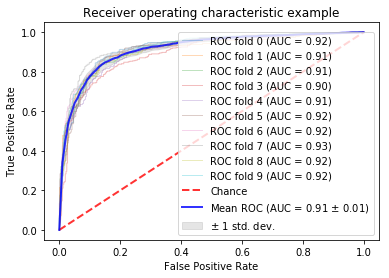

array([4.02989972e-04, 2.61568720e-03, 1.86282367e-01, ...,
       7.70919919e-01, 1.60739850e-03, 4.49502768e-05])

In [9]:
cv = StratifiedKFold(n_splits=10)
results = np.zeros_like(y, dtype=float)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    keras.backend.clear_session()
    prbs=[]
    quant_trans = sklearn.preprocessing.QuantileTransformer(output_distribution='uniform').fit(X[train,:])
    for mod in range(5):
        print('>>')
        curr_try = 0
        while curr_try <10:
            print('.')

            model = Sequential()
            model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))
            # Compile model
            opt = keras.optimizers.Adam(epsilon=None, amsgrad=True)
            model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
            
            # Fit the model
            history = model.fit(quant_trans.transform(X[train,:]), y[train], epochs=50, batch_size=64, verbose=0)
            if history.history['acc'][-1] > 0.53:
                break
            else:
                curr_try += 1

        # Fit the model
        model.fit(quant_trans.transform(X[train,:]), y[train], epochs=50, batch_size=64, verbose=1)
        
        # evaluate the model
        probas_ = model.predict(quant_trans.transform(X[test,:]))
        prbs.append(probas_)
    # Average the predictions
    probas_ = np.mean(np.hstack(prbs), axis=1)
    results[test] = probas_
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[ :])
    print('   ' + str(auc(fpr, tpr)))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
results

In [10]:
df_results = pd.DataFrame(data={"name": names, 'pred': results})
df_results.to_csv('/home/drewe/notebooks/genotox/pred.nn.v4.norm.csv', index=None)

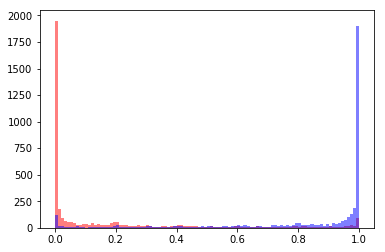

In [11]:
plt.hist(results[y==0],100, color='red', alpha=0.5)
plt.hist(results[y==1],100, color='blue', alpha=0.5)
plt.show()

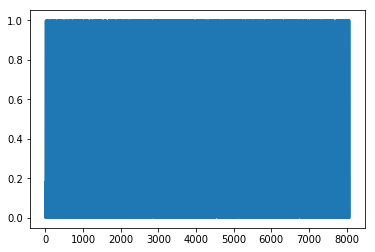

In [12]:
results[test] = probas_
plt.plot(results)

>>
.
Epoch 1/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4441 - acc: 0.7964
Epoch 2/50
7274/7274 [==============================] - 0s 25us/step - loss: 0.4452 - acc: 0.7949
Epoch 3/50
7274/7274 [==============================] - 0s 26us/step - loss: 0.4433 - acc: 0.7967
Epoch 4/50
7274/7274 [==============================] - 0s 26us/step - loss: 0.4444 - acc: 0.7958
Epoch 5/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4415 - acc: 0.7985
Epoch 6/50
7274/7274 [==============================] - 0s 25us/step - loss: 0.4428 - acc: 0.8013
Epoch 7/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4401 - acc: 0.7997
Epoch 8/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4452 - acc: 0.7983
Epoch 9/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4399 - acc: 0.8033
Epoch 10/50
7274/7274 [==============================] - 0s 26us/step - loss: 0.4403 - acc: 0.8013
Epoch 11/50
72

7274/7274 [==============================] - 0s 23us/step - loss: 0.4329 - acc: 0.8022
Epoch 34/50
7274/7274 [==============================] - 0s 30us/step - loss: 0.4321 - acc: 0.8052
Epoch 35/50
7274/7274 [==============================] - 0s 33us/step - loss: 0.4320 - acc: 0.8048
Epoch 36/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4323 - acc: 0.8071
Epoch 37/50
7274/7274 [==============================] - 0s 22us/step - loss: 0.4290 - acc: 0.8070
Epoch 38/50
7274/7274 [==============================] - 0s 22us/step - loss: 0.4279 - acc: 0.8081
Epoch 39/50
7274/7274 [==============================] - 0s 21us/step - loss: 0.4286 - acc: 0.8096
Epoch 40/50
7274/7274 [==============================] - 0s 22us/step - loss: 0.4297 - acc: 0.8071
Epoch 41/50
7274/7274 [==============================] - 0s 22us/step - loss: 0.4268 - acc: 0.8103
Epoch 42/50
7274/7274 [==============================] - 0s 22us/step - loss: 0.4266 - acc: 0.8099
Epoch 43/50
7274/7274 

Epoch 16/50
7274/7274 [==============================] - 0s 25us/step - loss: 0.4379 - acc: 0.8048
Epoch 17/50
7274/7274 [==============================] - 0s 23us/step - loss: 0.4343 - acc: 0.8046
Epoch 18/50
7274/7274 [==============================] - 0s 22us/step - loss: 0.4359 - acc: 0.8034
Epoch 19/50
7274/7274 [==============================] - 0s 23us/step - loss: 0.4350 - acc: 0.8055
Epoch 20/50
7274/7274 [==============================] - 0s 25us/step - loss: 0.4351 - acc: 0.8024
Epoch 21/50
7274/7274 [==============================] - 0s 23us/step - loss: 0.4401 - acc: 0.8004
Epoch 22/50
7274/7274 [==============================] - 0s 24us/step - loss: 0.4355 - acc: 0.8026
Epoch 23/50
7274/7274 [==============================] - 0s 22us/step - loss: 0.4342 - acc: 0.8064
Epoch 24/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4352 - acc: 0.8055
Epoch 25/50
7274/7274 [==============================] - 0s 22us/step - loss: 0.4334 - acc: 0.8046
Epoch 26/5

7274/7274 [==============================] - 0s 24us/step - loss: 0.4285 - acc: 0.8090
Epoch 49/50
7274/7274 [==============================] - 0s 24us/step - loss: 0.4272 - acc: 0.8075
Epoch 50/50
7274/7274 [==============================] - 0s 22us/step - loss: 0.4257 - acc: 0.8103
   0.8924720996467381
>>
.
Epoch 1/50
7274/7274 [==============================] - 0s 29us/step - loss: 0.4370 - acc: 0.8019
Epoch 2/50
7274/7274 [==============================] - 0s 29us/step - loss: 0.4391 - acc: 0.7994
Epoch 3/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4376 - acc: 0.8023
Epoch 4/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4373 - acc: 0.8015
Epoch 5/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4379 - acc: 0.8038
Epoch 6/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4342 - acc: 0.8053
Epoch 7/50
7274/7274 [==============================] - 0s 29us/step - loss: 0.4364 - acc: 0.8008
Ep

7274/7274 [==============================] - 0s 27us/step - loss: 0.4254 - acc: 0.8082
Epoch 31/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4257 - acc: 0.8108
Epoch 32/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4275 - acc: 0.8101
Epoch 33/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4246 - acc: 0.8095
Epoch 34/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4248 - acc: 0.8090
Epoch 35/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4244 - acc: 0.8103
Epoch 36/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4240 - acc: 0.8086
Epoch 37/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4249 - acc: 0.8071
Epoch 38/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4231 - acc: 0.8118
Epoch 39/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4269 - acc: 0.8077
Epoch 40/50
7274/7274 

Epoch 13/50
7274/7274 [==============================] - 0s 29us/step - loss: 0.4328 - acc: 0.8051
Epoch 14/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4337 - acc: 0.8051
Epoch 15/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4326 - acc: 0.8033
Epoch 16/50
7274/7274 [==============================] - 0s 29us/step - loss: 0.4309 - acc: 0.8042
Epoch 17/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4316 - acc: 0.8045
Epoch 18/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4320 - acc: 0.8064
Epoch 19/50
7274/7274 [==============================] - 0s 33us/step - loss: 0.4349 - acc: 0.8020
Epoch 20/50
7274/7274 [==============================] - 0s 35us/step - loss: 0.4303 - acc: 0.8078
Epoch 21/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4303 - acc: 0.8079
Epoch 22/50
7274/7274 [==============================] - 0s 29us/step - loss: 0.4318 - acc: 0.8034
Epoch 23/5

7274/7274 [==============================] - 0s 34us/step - loss: 0.4226 - acc: 0.8110
Epoch 46/50
7274/7274 [==============================] - 0s 34us/step - loss: 0.4234 - acc: 0.8099
Epoch 47/50
7274/7274 [==============================] - 0s 38us/step - loss: 0.4217 - acc: 0.8110
Epoch 48/50
7274/7274 [==============================] - 0s 59us/step - loss: 0.4243 - acc: 0.8112
Epoch 49/50
7274/7274 [==============================] - 0s 57us/step - loss: 0.4221 - acc: 0.8099
Epoch 50/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.4226 - acc: 0.8136
   0.8678018310943784
>>
.
Epoch 1/50
7274/7274 [==============================] - 0s 33us/step - loss: 0.4351 - acc: 0.8044
Epoch 2/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.4358 - acc: 0.8023
Epoch 3/50
7274/7274 [==============================] - 0s 31us/step - loss: 0.4412 - acc: 0.8000
Epoch 4/50
7274/7274 [==============================] - 0s 38us/step - loss: 0.4316 - acc: 0.8044

7274/7274 [==============================] - 0s 34us/step - loss: 0.4258 - acc: 0.8077
Epoch 28/50
7274/7274 [==============================] - 0s 41us/step - loss: 0.4261 - acc: 0.8082
Epoch 29/50
7274/7274 [==============================] - 0s 33us/step - loss: 0.4242 - acc: 0.8114
Epoch 30/50
7274/7274 [==============================] - 0s 35us/step - loss: 0.4256 - acc: 0.8101
Epoch 31/50
7274/7274 [==============================] - 0s 35us/step - loss: 0.4250 - acc: 0.8117
Epoch 32/50
7274/7274 [==============================] - 0s 30us/step - loss: 0.4232 - acc: 0.8092
Epoch 33/50
7274/7274 [==============================] - 0s 40us/step - loss: 0.4227 - acc: 0.8107
Epoch 34/50
7274/7274 [==============================] - 0s 47us/step - loss: 0.4237 - acc: 0.8121
Epoch 35/50
7274/7274 [==============================] - 0s 39us/step - loss: 0.4241 - acc: 0.8101
Epoch 36/50
7274/7274 [==============================] - 0s 33us/step - loss: 0.4244 - acc: 0.8100
Epoch 37/50
7274/7274 

Epoch 10/50
7274/7274 [==============================] - 0s 24us/step - loss: 0.4325 - acc: 0.8081
Epoch 11/50
7274/7274 [==============================] - 0s 25us/step - loss: 0.4293 - acc: 0.8038
Epoch 12/50
7274/7274 [==============================] - 0s 36us/step - loss: 0.4299 - acc: 0.8078
Epoch 13/50
7274/7274 [==============================] - 0s 24us/step - loss: 0.4283 - acc: 0.8078
Epoch 14/50
7274/7274 [==============================] - 0s 23us/step - loss: 0.4297 - acc: 0.8057
Epoch 15/50
7274/7274 [==============================] - 0s 23us/step - loss: 0.4312 - acc: 0.8060
Epoch 16/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4290 - acc: 0.8078
Epoch 17/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4290 - acc: 0.8115
Epoch 18/50
7274/7274 [==============================] - 0s 23us/step - loss: 0.4278 - acc: 0.8081
Epoch 19/50
7274/7274 [==============================] - 0s 25us/step - loss: 0.4278 - acc: 0.8092
Epoch 20/5

7274/7274 [==============================] - 0s 31us/step - loss: 0.4212 - acc: 0.8154
Epoch 43/50
7274/7274 [==============================] - 0s 33us/step - loss: 0.4228 - acc: 0.8118
Epoch 44/50
7274/7274 [==============================] - 0s 34us/step - loss: 0.4191 - acc: 0.8123
Epoch 45/50
7274/7274 [==============================] - 0s 33us/step - loss: 0.4248 - acc: 0.8086
Epoch 46/50
7274/7274 [==============================] - 0s 28us/step - loss: 0.4209 - acc: 0.8143
Epoch 47/50
7274/7274 [==============================] - 0s 26us/step - loss: 0.4202 - acc: 0.8141
Epoch 48/50
7274/7274 [==============================] - 0s 26us/step - loss: 0.4177 - acc: 0.8150
Epoch 49/50
7274/7274 [==============================] - 0s 27us/step - loss: 0.4187 - acc: 0.8150
Epoch 50/50
7274/7274 [==============================] - 0s 26us/step - loss: 0.4177 - acc: 0.8136
   0.8509821657763817
>>
.
Epoch 1/50
7275/7275 [==============================] - 0s 28us/step - loss: 0.4348 - acc: 0.8

7275/7275 [==============================] - 0s 25us/step - loss: 0.4275 - acc: 0.8084
Epoch 25/50
7275/7275 [==============================] - 0s 31us/step - loss: 0.4273 - acc: 0.8073
Epoch 26/50
7275/7275 [==============================] - 0s 28us/step - loss: 0.4278 - acc: 0.8069
Epoch 27/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4263 - acc: 0.8069
Epoch 28/50
7275/7275 [==============================] - 0s 28us/step - loss: 0.4259 - acc: 0.8095
Epoch 29/50
7275/7275 [==============================] - 0s 30us/step - loss: 0.4269 - acc: 0.8107
Epoch 30/50
7275/7275 [==============================] - 0s 29us/step - loss: 0.4254 - acc: 0.8088
Epoch 31/50
7275/7275 [==============================] - 0s 32us/step - loss: 0.4256 - acc: 0.8073
Epoch 32/50
7275/7275 [==============================] - 0s 29us/step - loss: 0.4267 - acc: 0.8089
Epoch 33/50
7275/7275 [==============================] - 0s 37us/step - loss: 0.4256 - acc: 0.8092
Epoch 34/50
7275/7275 

7275/7275 [==============================] - 0s 26us/step - loss: 0.4385 - acc: 0.7978
Epoch 7/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4352 - acc: 0.8033
Epoch 8/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4333 - acc: 0.8056
Epoch 9/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4330 - acc: 0.8038
Epoch 10/50
7275/7275 [==============================] - 0s 32us/step - loss: 0.4339 - acc: 0.8071
Epoch 11/50
7275/7275 [==============================] - 0s 35us/step - loss: 0.4325 - acc: 0.8060
Epoch 12/50
7275/7275 [==============================] - 0s 37us/step - loss: 0.4313 - acc: 0.8021
Epoch 13/50
7275/7275 [==============================] - 0s 31us/step - loss: 0.4317 - acc: 0.8056
Epoch 14/50
7275/7275 [==============================] - 0s 32us/step - loss: 0.4325 - acc: 0.8018
Epoch 15/50
7275/7275 [==============================] - 0s 35us/step - loss: 0.4306 - acc: 0.8067
Epoch 16/50
7275/7275 [==

Epoch 39/50
7275/7275 [==============================] - 0s 28us/step - loss: 0.4226 - acc: 0.8121
Epoch 40/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4210 - acc: 0.8121
Epoch 41/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4227 - acc: 0.8118
Epoch 42/50
7275/7275 [==============================] - 0s 39us/step - loss: 0.4224 - acc: 0.8087
Epoch 43/50
7275/7275 [==============================] - 0s 38us/step - loss: 0.4218 - acc: 0.8131
Epoch 44/50
7275/7275 [==============================] - 0s 45us/step - loss: 0.4195 - acc: 0.8146
Epoch 45/50
7275/7275 [==============================] - 0s 28us/step - loss: 0.4191 - acc: 0.8132
Epoch 46/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4202 - acc: 0.8110
Epoch 47/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4196 - acc: 0.8150
Epoch 48/50
7275/7275 [==============================] - 0s 32us/step - loss: 0.4231 - acc: 0.8082
Epoch 49/5

7275/7275 [==============================] - 0s 30us/step - loss: 0.4334 - acc: 0.8055
Epoch 22/50
7275/7275 [==============================] - 0s 32us/step - loss: 0.4319 - acc: 0.8099
Epoch 23/50
7275/7275 [==============================] - 0s 30us/step - loss: 0.4315 - acc: 0.8093
Epoch 24/50
7275/7275 [==============================] - 0s 30us/step - loss: 0.4304 - acc: 0.8110
Epoch 25/50
7275/7275 [==============================] - 0s 30us/step - loss: 0.4311 - acc: 0.8102
Epoch 26/50
7275/7275 [==============================] - 0s 30us/step - loss: 0.4306 - acc: 0.8067
Epoch 27/50
7275/7275 [==============================] - 0s 31us/step - loss: 0.4302 - acc: 0.8089
Epoch 28/50
7275/7275 [==============================] - 0s 29us/step - loss: 0.4316 - acc: 0.8070
Epoch 29/50
7275/7275 [==============================] - 0s 30us/step - loss: 0.4279 - acc: 0.8125
Epoch 30/50
7275/7275 [==============================] - 0s 33us/step - loss: 0.4276 - acc: 0.8102
Epoch 31/50
7275/7275 

7275/7275 [==============================] - 0s 33us/step - loss: 0.4390 - acc: 0.8040
Epoch 4/50
7275/7275 [==============================] - 0s 43us/step - loss: 0.4383 - acc: 0.8029
Epoch 5/50
7275/7275 [==============================] - 0s 28us/step - loss: 0.4358 - acc: 0.8065
Epoch 6/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4376 - acc: 0.8051
Epoch 7/50
7275/7275 [==============================] - 0s 31us/step - loss: 0.4373 - acc: 0.8021
Epoch 8/50
7275/7275 [==============================] - 0s 30us/step - loss: 0.4369 - acc: 0.8069
Epoch 9/50
7275/7275 [==============================] - 0s 30us/step - loss: 0.4394 - acc: 0.8010
Epoch 10/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4389 - acc: 0.8018
Epoch 11/50
7275/7275 [==============================] - 0s 28us/step - loss: 0.4348 - acc: 0.8066
Epoch 12/50
7275/7275 [==============================] - 0s 28us/step - loss: 0.4350 - acc: 0.8030
Epoch 13/50
7275/7275 [=====

Epoch 36/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4268 - acc: 0.8122
Epoch 37/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4285 - acc: 0.8114
Epoch 38/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4270 - acc: 0.8085
Epoch 39/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4242 - acc: 0.8129
Epoch 40/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4236 - acc: 0.8125
Epoch 41/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4253 - acc: 0.8111
Epoch 42/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4259 - acc: 0.8088
Epoch 43/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4241 - acc: 0.8135
Epoch 44/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4260 - acc: 0.8148
Epoch 45/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4242 - acc: 0.8115
Epoch 46/5

7275/7275 [==============================] - 0s 26us/step - loss: 0.4332 - acc: 0.8048
Epoch 19/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4346 - acc: 0.8037
Epoch 20/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4337 - acc: 0.8045
Epoch 21/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4359 - acc: 0.8025
Epoch 22/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4311 - acc: 0.8038
Epoch 23/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4367 - acc: 0.8012
Epoch 24/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4346 - acc: 0.8041
Epoch 25/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4326 - acc: 0.8051
Epoch 26/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4303 - acc: 0.8063
Epoch 27/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4286 - acc: 0.8110
Epoch 28/50
7275/7275 

7275/7275 [==============================] - 0s 26us/step - loss: 0.4280 - acc: 0.8073
>>
.
Epoch 1/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4381 - acc: 0.8023
Epoch 2/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4394 - acc: 0.7992
Epoch 3/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4407 - acc: 0.7967
Epoch 4/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4399 - acc: 0.7973
Epoch 5/50
7275/7275 [==============================] - 0s 34us/step - loss: 0.4405 - acc: 0.8001
Epoch 6/50
7275/7275 [==============================] - 0s 28us/step - loss: 0.4390 - acc: 0.8036
Epoch 7/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4422 - acc: 0.8008
Epoch 8/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4403 - acc: 0.7973
Epoch 9/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4375 - acc: 0.8005
Epoch 10/50
7275/7275 [===

Epoch 33/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4306 - acc: 0.8080
Epoch 34/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4295 - acc: 0.8045
Epoch 35/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4288 - acc: 0.8066
Epoch 36/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4300 - acc: 0.8081
Epoch 37/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4272 - acc: 0.8074
Epoch 38/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4302 - acc: 0.8063
Epoch 39/50
7275/7275 [==============================] - 0s 28us/step - loss: 0.4301 - acc: 0.8047
Epoch 40/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4305 - acc: 0.8069
Epoch 41/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4302 - acc: 0.8029
Epoch 42/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4297 - acc: 0.8052
Epoch 43/5

7275/7275 [==============================] - 0s 26us/step - loss: 0.4320 - acc: 0.8069
Epoch 16/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4327 - acc: 0.8085
Epoch 17/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4314 - acc: 0.8055
Epoch 18/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4302 - acc: 0.8100
Epoch 19/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4317 - acc: 0.8091
Epoch 20/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4319 - acc: 0.8099
Epoch 21/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4351 - acc: 0.8025
Epoch 22/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4322 - acc: 0.8082
Epoch 23/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4333 - acc: 0.8078
Epoch 24/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4328 - acc: 0.8063
Epoch 25/50
7275/7275 

7275/7275 [==============================] - 0s 27us/step - loss: 0.4238 - acc: 0.8148
Epoch 48/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4239 - acc: 0.8147
Epoch 49/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4276 - acc: 0.8133
Epoch 50/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4229 - acc: 0.8122
>>
.
Epoch 1/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4409 - acc: 0.8045
Epoch 2/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4391 - acc: 0.8022
Epoch 3/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4377 - acc: 0.8029
Epoch 4/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4406 - acc: 0.8036
Epoch 5/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4361 - acc: 0.8054
Epoch 6/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4372 - acc: 0.8060
Epoch 7/50
7275/7275 [=

Epoch 30/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4290 - acc: 0.8087
Epoch 31/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4281 - acc: 0.8095
Epoch 32/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4277 - acc: 0.8106
Epoch 33/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4284 - acc: 0.8098
Epoch 34/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4284 - acc: 0.8098
Epoch 35/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4293 - acc: 0.8098
Epoch 36/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4255 - acc: 0.8139
Epoch 37/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4288 - acc: 0.8103
Epoch 38/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4264 - acc: 0.8117
Epoch 39/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4264 - acc: 0.8157
Epoch 40/5

7275/7275 [==============================] - 0s 26us/step - loss: 0.4294 - acc: 0.8088
Epoch 13/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4303 - acc: 0.8040
Epoch 14/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4367 - acc: 0.8021
Epoch 15/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4360 - acc: 0.8011
Epoch 16/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4294 - acc: 0.8067
Epoch 17/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4323 - acc: 0.8070
Epoch 18/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4319 - acc: 0.8044
Epoch 19/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4287 - acc: 0.8080
Epoch 20/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4263 - acc: 0.8128
Epoch 21/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4271 - acc: 0.8063
Epoch 22/50
7275/7275 

7275/7275 [==============================] - 0s 26us/step - loss: 0.4245 - acc: 0.8070
Epoch 45/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4231 - acc: 0.8103
Epoch 46/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4230 - acc: 0.8110
Epoch 47/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4200 - acc: 0.8121
Epoch 48/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4209 - acc: 0.8162
Epoch 49/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4208 - acc: 0.8143
Epoch 50/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4207 - acc: 0.8136
>>
.
Epoch 1/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4379 - acc: 0.7988
Epoch 2/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4354 - acc: 0.8021
Epoch 3/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4358 - acc: 0.8004
Epoch 4/50
7275/7275

Epoch 27/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4284 - acc: 0.8100
Epoch 28/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4256 - acc: 0.8076
Epoch 29/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4273 - acc: 0.8080
Epoch 30/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4255 - acc: 0.8120
Epoch 31/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4231 - acc: 0.8109
Epoch 32/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4249 - acc: 0.8132
Epoch 33/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4237 - acc: 0.8107
Epoch 34/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4225 - acc: 0.8124
Epoch 35/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4240 - acc: 0.8129
Epoch 36/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4247 - acc: 0.8078
Epoch 37/5

7275/7275 [==============================] - 0s 26us/step - loss: 0.4362 - acc: 0.8015
Epoch 10/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4344 - acc: 0.8043
Epoch 11/50
7275/7275 [==============================] - 0s 30us/step - loss: 0.4344 - acc: 0.8011
Epoch 12/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4350 - acc: 0.8019
Epoch 13/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4361 - acc: 0.8018
Epoch 14/50
7275/7275 [==============================] - 0s 37us/step - loss: 0.4336 - acc: 0.8059
Epoch 15/50
7275/7275 [==============================] - 0s 32us/step - loss: 0.4312 - acc: 0.8071
Epoch 16/50
7275/7275 [==============================] - 0s 28us/step - loss: 0.4323 - acc: 0.8056
Epoch 17/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4324 - acc: 0.8085
Epoch 18/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4338 - acc: 0.8026
Epoch 19/50
7275/7275 

7275/7275 [==============================] - 0s 27us/step - loss: 0.4276 - acc: 0.8102
Epoch 42/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4257 - acc: 0.8099
Epoch 43/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4279 - acc: 0.8059
Epoch 44/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4220 - acc: 0.8122
Epoch 45/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4269 - acc: 0.8088
Epoch 46/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4235 - acc: 0.8139
Epoch 47/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4223 - acc: 0.8124
Epoch 48/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4199 - acc: 0.8118
Epoch 49/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4230 - acc: 0.8139
Epoch 50/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4206 - acc: 0.8151
>>
.
Epoch 1/50
7275/7

Epoch 24/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4301 - acc: 0.8058
Epoch 25/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4281 - acc: 0.8081
Epoch 26/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4305 - acc: 0.8098
Epoch 27/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4291 - acc: 0.8082
Epoch 28/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4283 - acc: 0.8073
Epoch 29/50
7275/7275 [==============================] - 0s 23us/step - loss: 0.4286 - acc: 0.8074
Epoch 30/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4273 - acc: 0.8089
Epoch 31/50
7275/7275 [==============================] - 0s 38us/step - loss: 0.4271 - acc: 0.8065
Epoch 32/50
7275/7275 [==============================] - 0s 48us/step - loss: 0.4261 - acc: 0.8100
Epoch 33/50
7275/7275 [==============================] - 0s 51us/step - loss: 0.4249 - acc: 0.8114
Epoch 34/5

7275/7275 [==============================] - 0s 27us/step - loss: 0.4354 - acc: 0.8063
Epoch 7/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4368 - acc: 0.8034
Epoch 8/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4359 - acc: 0.8060
Epoch 9/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4354 - acc: 0.8044
Epoch 10/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4355 - acc: 0.8047
Epoch 11/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4341 - acc: 0.8056
Epoch 12/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4334 - acc: 0.8089
Epoch 13/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4356 - acc: 0.8081
Epoch 14/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4347 - acc: 0.8092
Epoch 15/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4315 - acc: 0.8074
Epoch 16/50
7275/7275 [==

Epoch 39/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4246 - acc: 0.8126
Epoch 40/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4256 - acc: 0.8117
Epoch 41/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4237 - acc: 0.8140
Epoch 42/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4253 - acc: 0.8091
Epoch 43/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4226 - acc: 0.8114
Epoch 44/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4280 - acc: 0.8070
Epoch 45/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4238 - acc: 0.8129
Epoch 46/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4263 - acc: 0.8131
Epoch 47/50
7275/7275 [==============================] - 0s 29us/step - loss: 0.4247 - acc: 0.8133
Epoch 48/50
7275/7275 [==============================] - 0s 33us/step - loss: 0.4234 - acc: 0.8164
Epoch 49/5

7275/7275 [==============================] - 0s 25us/step - loss: 0.4316 - acc: 0.8082
Epoch 22/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4288 - acc: 0.8100
Epoch 23/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4290 - acc: 0.8096
Epoch 24/50
7275/7275 [==============================] - 0s 27us/step - loss: 0.4304 - acc: 0.8110
Epoch 25/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4289 - acc: 0.8122
Epoch 26/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4318 - acc: 0.8100
Epoch 27/50
7275/7275 [==============================] - 0s 28us/step - loss: 0.4344 - acc: 0.8067
Epoch 28/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4306 - acc: 0.8082
Epoch 29/50
7275/7275 [==============================] - 0s 26us/step - loss: 0.4282 - acc: 0.8095
Epoch 30/50
7275/7275 [==============================] - 0s 25us/step - loss: 0.4270 - acc: 0.8102
Epoch 31/50
7275/7275 

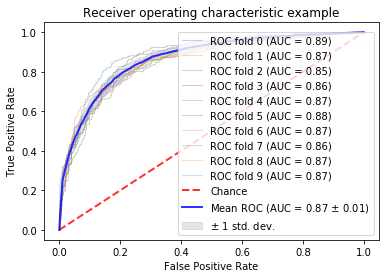

array([0.08044943, 0.07390783, 0.08255558, ..., 0.67880201, 0.07709893,
       0.10023439])

In [13]:
#Logistic regression (SGD)
cv = StratifiedKFold(n_splits=10)
results = np.zeros_like(y, dtype=float)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    keras.backend.clear_session()
    prbs=[]
    
    quant_trans = sklearn.preprocessing.QuantileTransformer(output_distribution='uniform').fit(X[train,:])
    for mod in range(5):
        print('>>')
        curr_try = 0
        while curr_try <10:
            print('.')

            model = Sequential()
            model.add(Dense(1, activation='sigmoid'))
            # Compile model
            opt = keras.optimizers.Adam(epsilon=None, amsgrad=True)
            model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
            
            # Fit the model
            history = model.fit(quant_trans.transform(X[train,:]), y[train], epochs=50, batch_size=64, verbose=0)
            if history.history['acc'][-1] > 0.53:
                break
            else:
                curr_try += 1

        # Fit the model
        model.fit(quant_trans.transform(X[train,:]), y[train], epochs=50, batch_size=64, verbose=1)
        
        # evaluate the model
        probas_ = model.predict(quant_trans.transform(X[test,:]))
        prbs.append(probas_)
    # Average the predictions
    probas_ = np.mean(np.hstack(prbs), axis=1)
    results[test] = probas_
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[ :])
    print('   ' + str(auc(fpr, tpr)))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
results

In [14]:
df_results = pd.DataFrame(data={"name": names, 'pred': results})
df_results.to_csv('/home/drewe/notebooks/genotox/pred.lr.v4.norm.csv', index=None)

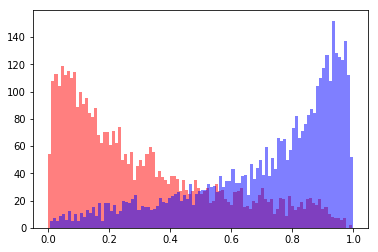

In [15]:
plt.hist(results[y==0],100, color='red', alpha=0.5)
plt.hist(results[y==1],100, color='blue', alpha=0.5)
plt.show()

/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.899745138065494


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.8686391472820838


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.8524062144751801


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.8642317966816166


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.8784158027596011


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.8867914123961473


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.8849441217557532


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.868153076979634


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.8743168394480798


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.8746538244736908


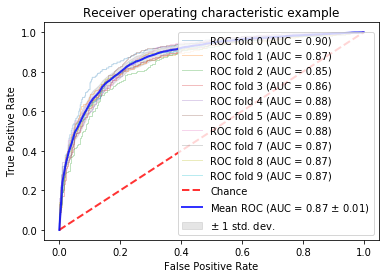

array([0.04848157, 0.05704057, 0.01465255, ..., 0.77040749, 0.05716322,
       0.05729546])

In [16]:
#Logistic regression (scikit)
cv = StratifiedKFold(n_splits=10)
results = np.zeros_like(y, dtype=float)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    keras.backend.clear_session()
    prbs=[]
    model = LogisticRegression(random_state=0)
    
    quant_trans = sklearn.preprocessing.QuantileTransformer(output_distribution='uniform').fit(X[train,:])
    #quantile_transform(X, axis=1, output_distribution='uniform', copy=True)
    model.fit(quant_trans.transform(X[train,:]), y[train])
    probas_ = model.predict_proba(quant_trans.transform(X[test,:]))[:, 1]
    results[test] = probas_
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[ :])
    print('   ' + str(auc(fpr, tpr)))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
results

In [17]:
df_results = pd.DataFrame(data={"name": names, 'pred': results})
df_results.to_csv('/home/drewe/notebooks/genotox/pred.lr2.norm.v4.csv', index=None)

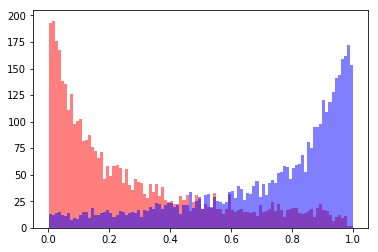

In [18]:
plt.hist(results[y==0],100, color='red', alpha=0.5)
plt.hist(results[y==1],100, color='blue', alpha=0.5)
plt.show()

>>
   0.9149390653840042
>>
   0.9166228654549011
>>
   0.8925973914850445
>>
   0.8909884077151189
>>
   0.900546528441536
>>
   0.9140075484645737
>>
   0.9102731416807588
>>
   0.9001053844080092
>>
   0.910092395167022
>>
   0.918032987770507


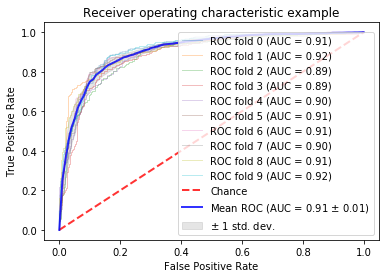

array([0.11857681, 0.17034412, 0.19707971, ..., 0.56568894, 0.24659538,
       0.23726879])

In [19]:
cv = StratifiedKFold(n_splits=10)
results = np.zeros_like(y, dtype=float)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    print('>>')
    keras.backend.clear_session()
    prbs=[]
    model = RandomForestClassifier(n_estimators=1000, random_state=0, max_leaf_nodes=200)
    # Fit the model
    quant_trans = sklearn.preprocessing.QuantileTransformer(output_distribution='uniform').fit(X[train,:])
    #quantile_transform(X, axis=1, output_distribution='uniform', copy=True)
    model.fit(quant_trans.transform(X[train,:]), y[train])
    probas_ = model.predict_proba(quant_trans.transform(X[test,:]))[:, 1]
    results[test] = probas_

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[ :])
    print('   ' + str(auc(fpr, tpr)))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
results

In [20]:
df_results = pd.DataFrame(data={"name": names, 'pred': results})
df_results.to_csv('/home/drewe/notebooks/genotox/pred.rf.norm.v4.csv', index=None)

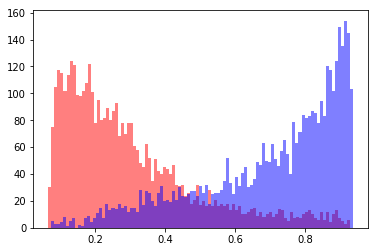

In [21]:
plt.hist(results[y==0],100, color='red', alpha=0.5)
plt.hist(results[y==1],100, color='blue', alpha=0.5)
plt.show()

>>
   0.9077088095441821
>>
   0.8960444449877153
>>
   0.8856971726827122
>>
   0.8795125358429527
>>
   0.884052643188001
>>
   0.9000104159007914
>>
   0.8931696198808912
>>
   0.8840587701884667
>>
   0.8873550964389874
>>
   0.898101855255741


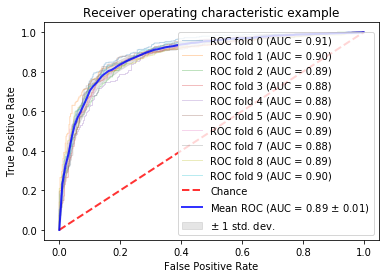

array([0.06428357, 0.025881  , 0.09142417, ..., 0.59375565, 0.06154057,
       0.09877931])

In [22]:
cv = StratifiedKFold(n_splits=10)
results = np.zeros_like(y, dtype=float)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    print('>>')
    keras.backend.clear_session()
    prbs=[]
    model = SVC(kernel='rbf', gamma='scale', probability=True)
    # Fit the model
    quant_trans = sklearn.preprocessing.QuantileTransformer(output_distribution='uniform').fit(X[train,:])
    #quantile_transform(X, axis=1, output_distribution='uniform', copy=True)
    model.fit(quant_trans.transform(X[train,:]), y[train])
    probas_ = model.predict_proba(quant_trans.transform(X[test,:]))[:, 1]
    results[test] = probas_

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[ :])
    print('   ' + str(auc(fpr, tpr)))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
results

In [23]:
df_results = pd.DataFrame(data={"name": names, 'pred': results})
df_results.to_csv('/home/drewe/notebooks/genotox/pred.svm.norm.v4.csv', index=None)

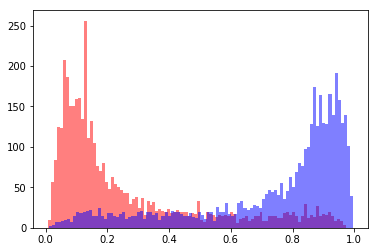

In [24]:
plt.hist(results[y==0],100, color='red', alpha=0.5)
plt.hist(results[y==1],100, color='blue', alpha=0.5)
plt.show()